In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coconut

In [104]:
df1 = pd.read_csv('data/round5/trades_round_4_day_1_wn.csv', delimiter=';')
df2 = pd.read_csv('data/round5/trades_round_4_day_2_wn.csv', delimiter=';')
df3 = pd.read_csv('data/round5/trades_round_4_day_3_wn.csv', delimiter=';')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
prices = combined_df[['symbol', 'price']]

In [105]:
coconut_prices = prices[prices['symbol'] == 'COCONUT']
coupon_prices = prices[prices['symbol'] == 'COCONUT_COUPON']

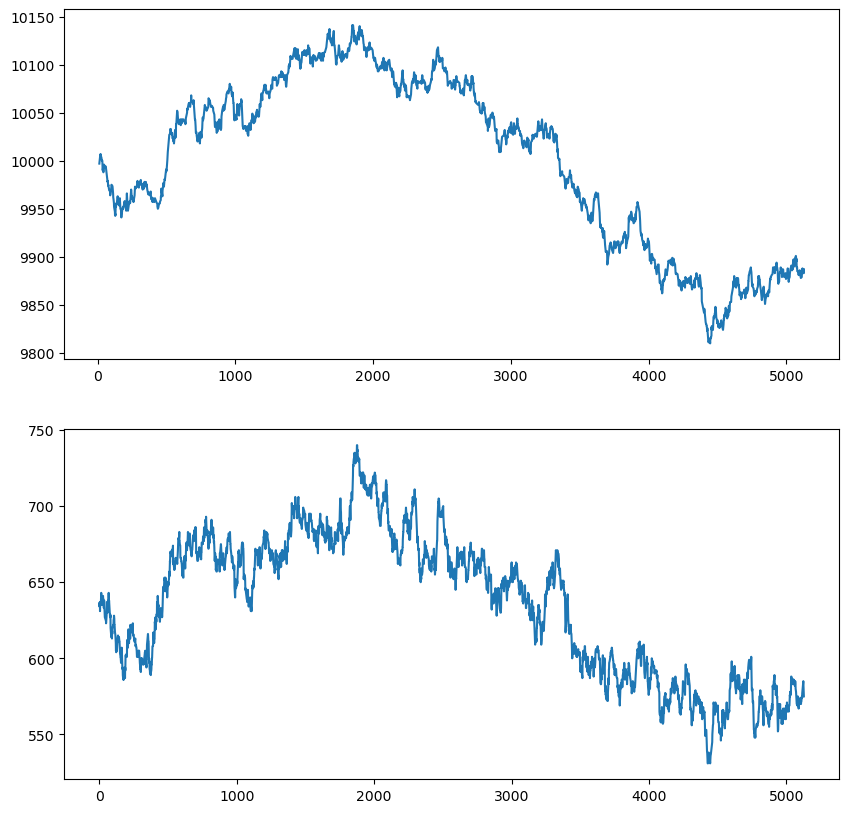

In [106]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(coconut_prices['price'], label='Coconut')
axs[1].plot(coupon_prices['price'], label='Coupon')

/tmp/ipykernel_3372/3269814615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_prices['diff'] = coconut_prices['price'].diff(100)


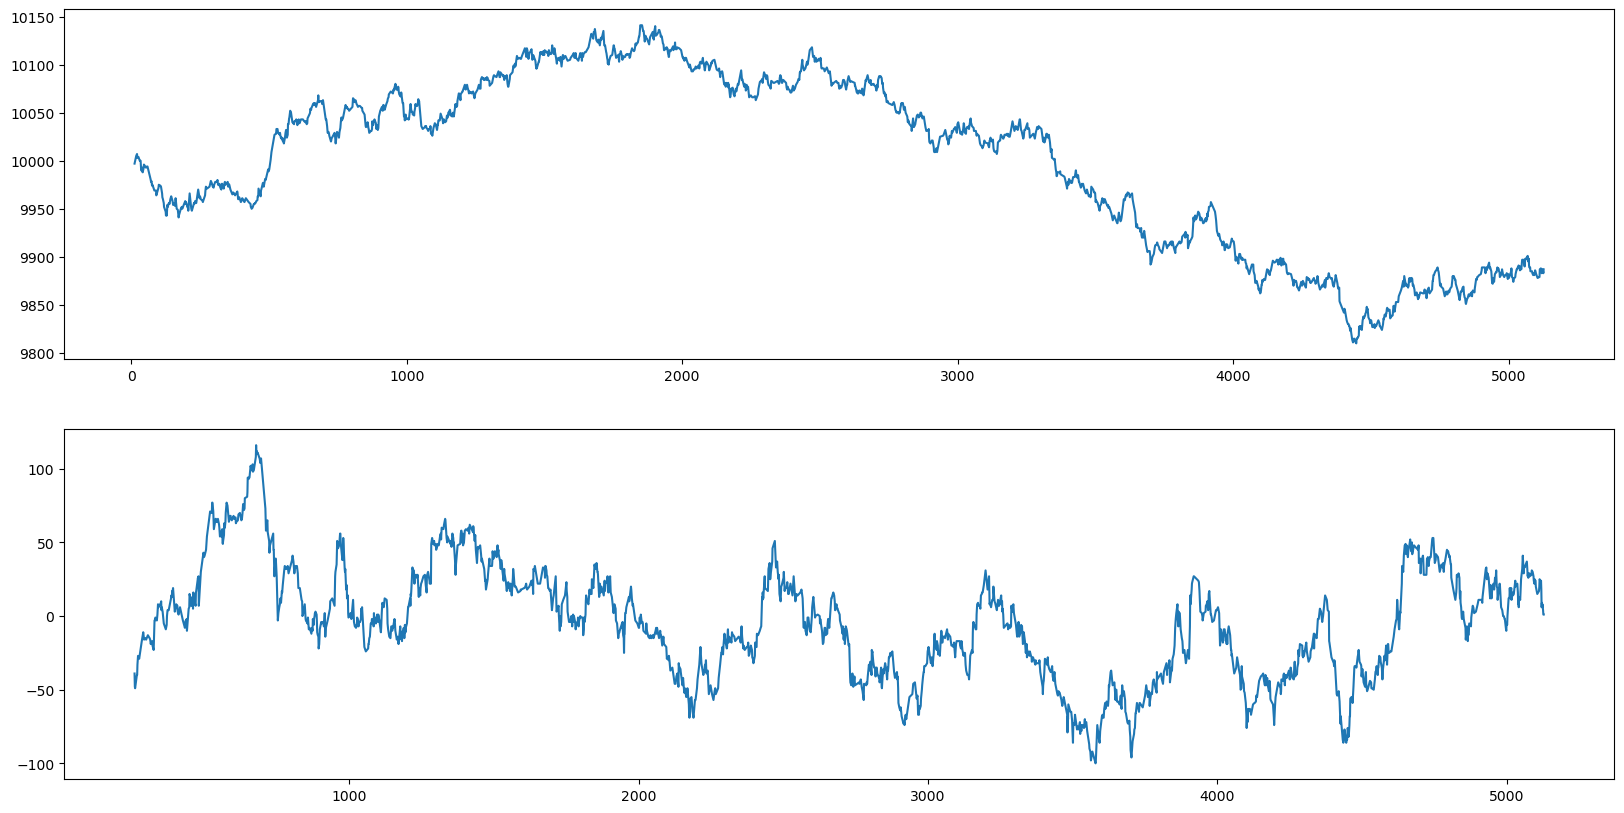

In [107]:
coconut_prices['diff'] = coconut_prices['price'].diff(100)

fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(coconut_prices['price'], label='Coconut')
axs[1].plot(coconut_prices['diff'], label = 'Diff')

# Gift Basket

In [108]:
df4 = pd.read_csv('data/round5/trades_round_3_day_0_wn.csv', delimiter=';')
df5 = pd.read_csv('data/round5/trades_round_3_day_1_wn.csv', delimiter=';')
df6 = pd.read_csv('data/round5/trades_round_3_day_2_wn.csv', delimiter=';')

combined_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
prices = combined_df[['symbol', 'price']]

In [109]:
strawberry_prices = prices[prices['symbol'] == 'STRAWBERRIES']
rose_prices = prices[prices['symbol'] == 'ROSES']
chocolate_prices = prices[prices['symbol'] == 'CHOCOLATE']
basket_prices = prices[prices['symbol'] == 'GIFT_BASKET']

In [110]:
strawberry_prices = strawberry_prices['price']
rose_prices = rose_prices['price']
chocolate_prices = chocolate_prices['price']
basket_prices = basket_prices['price']

# Create a new DataFrame with these columns
combined_prices = pd.DataFrame({
    'strawberry_price': strawberry_prices,
    'rose_price': rose_prices,
    'chocolate_price': chocolate_prices,
    'basket_price': basket_prices
})

combined_prices = combined_prices.fillna(method='ffill')

/tmp/ipykernel_3372/4124893781.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_prices = combined_prices.fillna(method='ffill')


In [111]:
def calculate_new_column(row):
    strawberry_price = row['strawberry_price']
    rose_price = row['rose_price']
    chocolate_price = row['chocolate_price']
    basket_price = row['basket_price']
    
    # Calculate the new value using the specified formula
    new_value = basket_price - (6 * strawberry_price + rose_price + 4 * chocolate_price)
    
    return new_value

# Apply the calculation function to each row in the DataFrame
combined_prices['spread'] = combined_prices.apply(calculate_new_column, axis=1)

# Fill NaN values in the new_column using the last valid value (ffill)
combined_prices['spread'] = combined_prices['spread'].fillna(method='ffill')

/tmp/ipykernel_3372/2819838055.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_prices['spread'] = combined_prices['spread'].fillna(method='ffill')


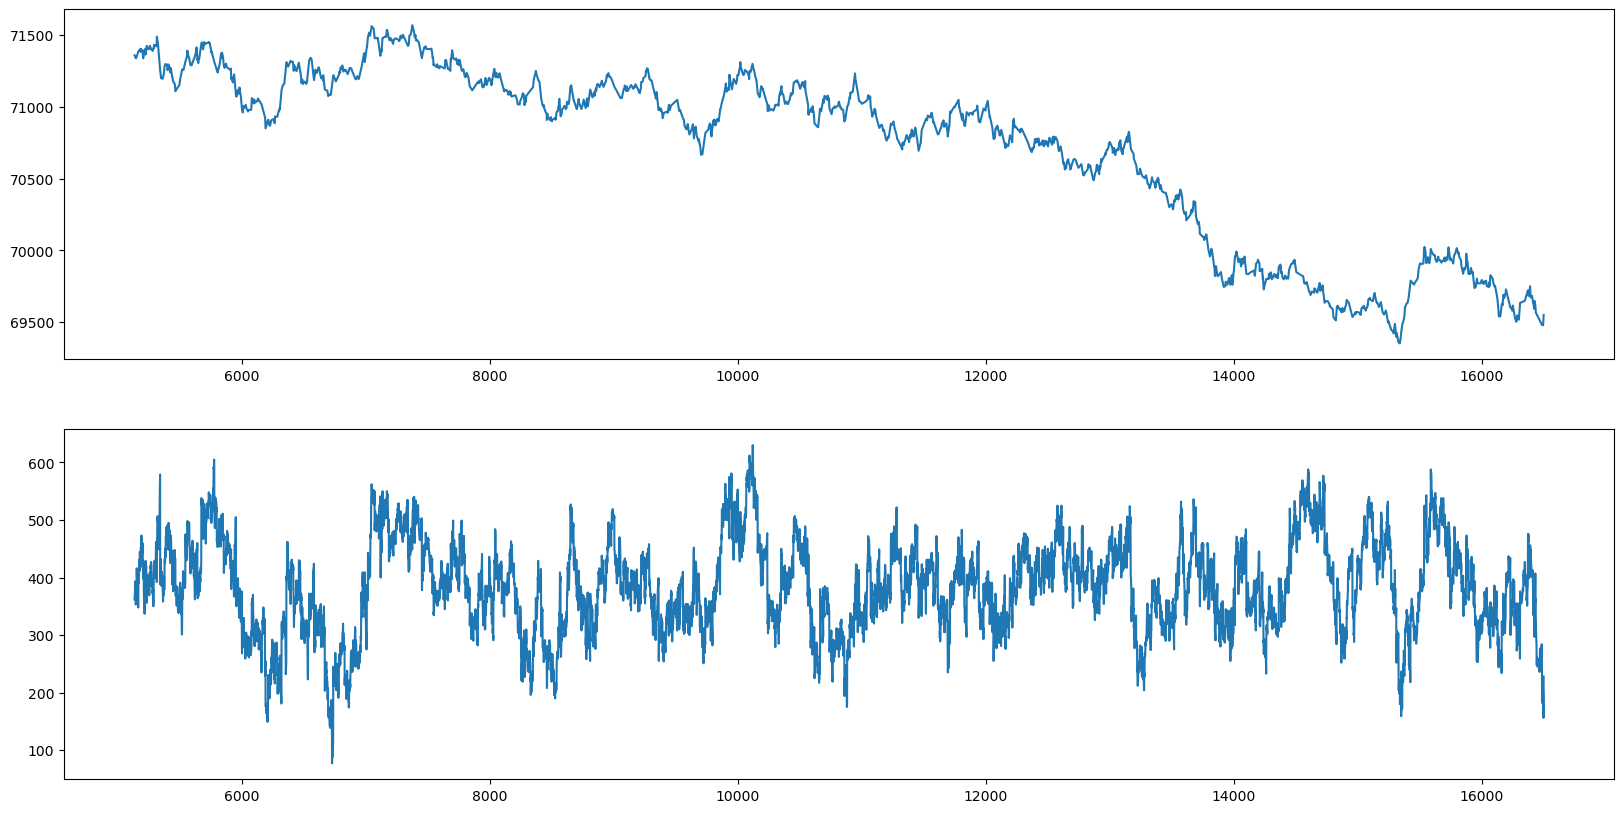

In [112]:
# plot
fig, axs = plt.subplots(2, figsize=(20, 10))

axs[0].plot(basket_prices, label='basket price')
axs[1].plot(combined_prices['spread'], label='spread')